# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 2 March 2022 from GDrive
(1) CF for SED and Water: https://drive.google.com/drive/folders/1hm4YNib_kI5Y4k7xp4E47w8qDjUIsagA?usp=sharing
(2) Metadata:

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
fn_sed = "../Dataset/Sediment_Prevalence_10__commat_2021-09-29.csv"
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29.csv"
df_sed = pd.read_csv(fn_sed)
print('Sediment: ' + str(df_sed.shape))

df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_sed.columns.nunique())
print(df_water.columns.nunique())

# Check how many overlapping CF
print(len(set(df_sed.columns).intersection(set(df_water.columns))))

# Join datasets
df = pd.concat([df_sed, df_water], join="outer")
print(df.shape)

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()
df['type'] = df['sample_id'].str.split('_').str[0]
df['location'] = df['sample_id'].str.split('_').str[-2]
print(df.shape)
df.head()

Sediment: (239, 4053)
Water: (265, 4936)
4053
4936
2109
(504, 6880)
Duplicated column: False
(504, 6882)


,sample_id,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,...,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,type,location
0,SED_S19S.0001_D_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
1,SED_S19S.0001_M_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M
2,SED_S19S.0001_U_Field,1,1.0,1,1.0,1,0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,U
3,SED_S19S.0003_D_Field,1,0.0,1,0.0,1,1,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
4,SED_S19S.0003_M_Field,1,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M


In [3]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['type','location']]).toarray())
encoder_df.columns = ['SED','SW','D','M','U']
#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df).set_index('sample_id')
final_df.drop(['type', 'location'], axis='columns', inplace=True)
final_df = final_df.apply(pd.to_numeric).astype(int)
final_df.head()

,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,SED,SW,D,M,U
sample_id,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0001_M_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
SED_S19S.0001_U_Field,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
SED_S19S.0003_D_Field,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0003_M_Field,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
#final_df.to_csv('all.csv')

In [5]:
col = ['SED','SW','D','M','U']
final_df[col].value_counts()

SED  SW  D  M  U
0    1   0  0  1    265
1    0   0  1  0     83
            0  1     80
         1  0  0     76
dtype: int64

In [6]:
temp = final_df.groupby(col).sum().reset_index(drop=True).T
temp.head(5)

,0,1,2,3
C10H10O5,245,74,75,71
C10H10O5N4,0,60,63,53
C10H10O6,250,69,66,63
C10H10O6N4,0,42,41,40
C10H10O7,234,60,53,54


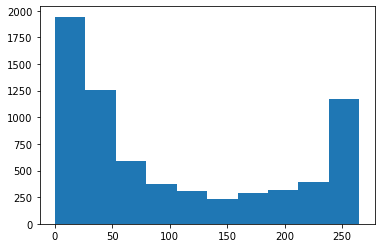

In [7]:
plt.hist(temp[0])
plt.show()

Questions to clarify before further analysis:
    
    (1) SED, SW, D, M, U (2 types, 3 locations = 6 categories) with CF? >> There are only four categories: SED_D, SED_M, SED_U and SW_U
    (2) Prior knowledge on CF for feature engineering e.g. common CF, rare CF etc. >> we do know the unique CF only in SED or SW only, we are interested in the overlap?
    (3) Data understanding from topic 1 slide: Core and satellite? 
    (4) Clustering: on metadata? on CF? Does it make sense to reduce the dimensions of CF using PCA? or can we engineer feature based on the CF? Expecting to find plant-based, microbial-based >> what data tell you this
    (5) Definition of clusters >> Unsupervised doesn't make sense if we already know the cluster is the categories
    (6) Need to clarify the research question: keywords of ecological processes, assembly of molecules, OM

## Clustering the water samples based on principal components after normalisation across row and col for high dimensional binary data

Shape:(265, 4935)


<AxesSubplot:>

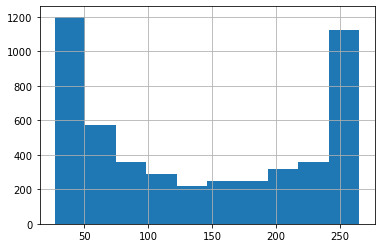

In [8]:
sw = pd.DataFrame(final_df[(final_df['SW']==1)].iloc[:,:-5])
sw = sw.loc[:, (sw != 0).any(axis=0)]
print("Shape:" + str(sw.shape))
sw.sum().hist()

In [9]:
# CF to be dropped due to high appearance
threshold = 264
to_remove = (sw.sum() >= threshold)
cols_to_drop = to_remove[to_remove].index
print(str(len(cols_to_drop)) + " CF appear in almost all sample, to be removed.")
sw = sw.drop(cols_to_drop, axis=1)
sw.shape

372 CF appear in almost all sample, to be removed.


(265, 4563)

In [10]:
nsw = sw.div(sw.sum(axis=1), axis=0)
nsw.head()

,C10H10O5,C10H10O6,C10H10O7,C10H10O8,C10H11O5N,C10H11O6N,C10H12O5,C10H12O5N2,C10H12O5S,C10H12O6,...,C9H14O5S,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N
sample_id,,,,,,,,,,,,,,,,,,,,,
SW_S19S.0003_U_1,0.000509,0.000509,0.000509,0.000509,0.000509,0.000509,0.000509,0.000509,0.0,0.000509,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000509,0.000509
SW_S19S.0003_U_2,0.000457,0.000457,0.000457,0.000457,0.000457,0.000457,0.000457,0.000457,0.0,0.000457,...,0.0,0.0,0.0,0.000457,0.0,0.0000,0.0,0.0,0.000000,0.000457
SW_S19S.0003_U_3,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.0,0.000415,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.000415
SW_S19S.0004_U_1,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.0,0.000408,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.000408
SW_S19S.0004_U_2,0.000400,0.000400,0.000400,0.000400,0.000400,0.000400,0.000400,0.000400,0.0,0.000400,...,0.0,0.0,0.0,0.000400,0.0,0.0004,0.0,0.0,0.000400,0.000400


In [11]:
from sklearn.preprocessing import StandardScaler
#define scaler
scaler = StandardScaler()
#create copy of DataFrame
scaled_df=nsw.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.head()

,C10H10O5,C10H10O6,C10H10O7,C10H10O8,C10H11O5N,C10H11O6N,C10H12O5,C10H12O5N2,C10H12O5S,C10H12O6,...,C9H14O5S,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N
0,0.461775,0.456889,0.667817,0.705142,1.000721,1.080024,0.378268,0.190074,-0.642769,0.505935,...,-0.409861,-0.451601,-0.380949,-0.527185,-0.301082,-0.415012,-0.566674,-0.361288,2.900496,1.404275
1,0.175323,0.150762,0.367911,0.411420,0.760714,0.838187,0.083199,-0.079566,-0.642769,0.209392,...,-0.409861,-0.451601,-0.380949,1.976289,-0.301082,-0.415012,-0.566674,-0.361288,-0.477020,1.166141
2,-0.054888,-0.095260,0.126888,0.175368,0.567829,0.643832,-0.153937,-0.296266,-0.642769,-0.028928,...,-0.409861,-0.451601,-0.380949,-0.527185,-0.301082,-0.415012,-0.566674,-0.361288,-0.477020,0.974762
3,-0.092843,-0.135821,0.087152,0.136450,0.536028,0.611789,-0.193033,-0.331992,-0.642769,-0.068219,...,-0.409861,-0.451601,-0.380949,-0.527185,-0.301082,-0.415012,-0.566674,-0.361288,-0.477020,0.943210
4,-0.133942,-0.179743,0.044122,0.094308,0.501593,0.577091,-0.235369,-0.370679,-0.642769,-0.110766,...,-0.409861,-0.451601,-0.380949,1.666488,-0.301082,2.382303,-0.566674,-0.361288,2.178192,0.909044


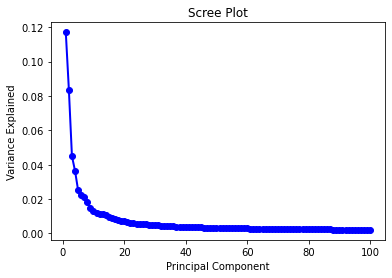

In [12]:
# Dimensionality reduction
from sklearn.decomposition import PCA

n = 100

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [13]:
print(pca.explained_variance_ratio_)

[0.11709752 0.08371734 0.04500474 0.03646724 0.02520591 0.02246231
 0.02120184 0.01811923 0.01493857 0.01318117 0.01209308 0.01146136
 0.01119338 0.01050448 0.00947591 0.0091291  0.00856452 0.00810782
 0.00740179 0.00713058 0.00646768 0.00610787 0.00604074 0.00575165
 0.00566209 0.00539307 0.0052031  0.00500461 0.00486679 0.00482699
 0.00468005 0.00441124 0.00425342 0.0041403  0.00409349 0.00404394
 0.00395623 0.00390057 0.00389715 0.00383097 0.00376266 0.00370193
 0.00363642 0.00357889 0.00348912 0.00343912 0.00340118 0.00332813
 0.00330633 0.00326842 0.00319141 0.00318078 0.00313729 0.00311114
 0.00302403 0.00300831 0.00298782 0.00296341 0.00292975 0.00292253
 0.00286273 0.0028586  0.00284067 0.00279677 0.00278778 0.00276224
 0.00274087 0.00269554 0.0026671  0.00266538 0.0026298  0.00259509
 0.00257593 0.0025561  0.00252965 0.00250828 0.00247337 0.00245693
 0.00244951 0.00242678 0.00241576 0.002396   0.0023809  0.00237768
 0.00236201 0.00232487 0.00230776 0.00228737 0.00227943 0.0022

Text(0, 0.5, 'Cumulative explained variance')

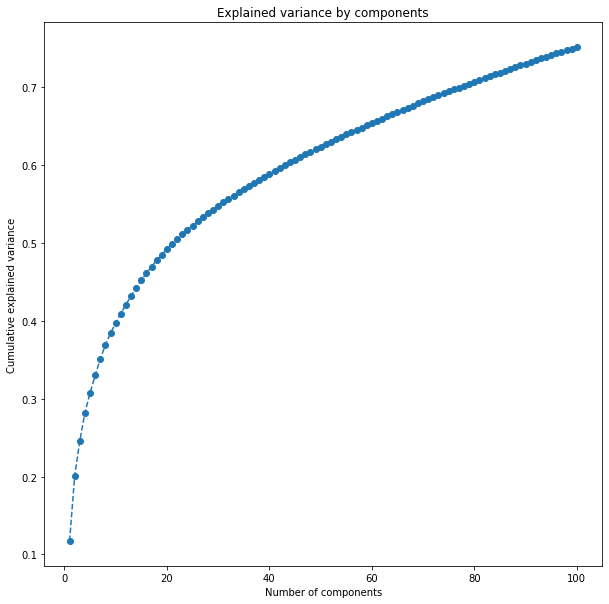

In [14]:
plt.figure(figsize = (10,10))
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### Clustering

In [15]:
# Based on scree plot, 7PCs for ?% variance explained
#define PCA model to use
pca = PCA(n_components=7)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)
X = pca.transform(scaled_df)

In [16]:
# Keep only CF
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(4,20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

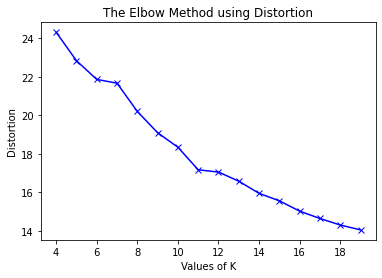

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

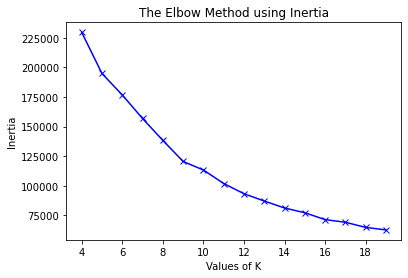

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [20]:
k = 5
kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)
mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
mapping2[k] = kmeanModel.inertia_

In [21]:
from sklearn import metrics
metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')

0.27194217004340576

C:\Users\mchang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


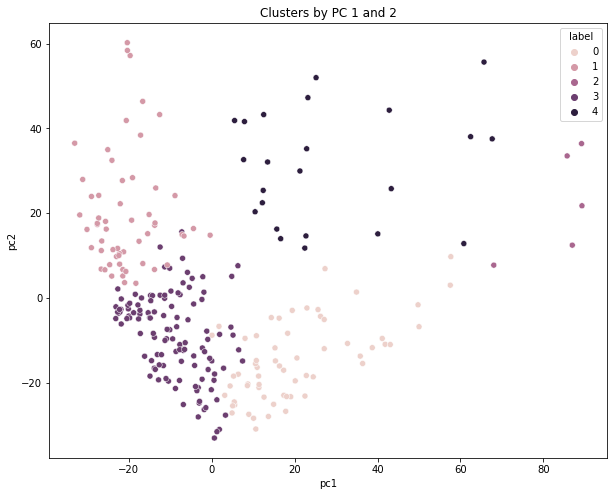

In [22]:
# Visualise
sw_pca_kmeans = pd.concat([sw.reset_index(), pd.DataFrame(X)], axis=1)
sw_pca_kmeans.columns.values[-7:] = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'] 
sw_pca_kmeans['label'] = kmeanModel.labels_

x_axis = sw_pca_kmeans['pc1']
y_axis = sw_pca_kmeans['pc2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = sw_pca_kmeans['label'])
plt.title('Clusters by PC 1 and 2')
plt.show()

In [23]:
results = sw.copy()
results["cluster"] = kmeanModel.labels_
temp = results.groupby("cluster").any()
temp.sum(axis=1)

cluster
0    4215
1    4503
2    1335
3    4558
4    3280
dtype: int64

In [24]:
# label cluster
results["KNN_label"] = np.nan
results.loc[results["cluster"] == 2, "KNN_label"] = "Least"
results.loc[results["cluster"] == 4, "KNN_label"] = "Less"
results.loc[results["cluster"] == 0, "KNN_label"] = "Average"
results.loc[results["cluster"] == 1, "KNN_label"] = "More"
results.loc[results["cluster"] == 3, "KNN_label"] = "Most"

In [25]:
results.to_csv('knn.csv')